Detect start of sentences in text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/sample.csv')
df


,Title,Author,Text,Author_counts
0,Hittel on Gold Mines and Mining,John S. Hittell,HITTEL ON GOLD MINES AND MINING *** Produced b...,1
1,"Diary of Battery A, First Regiment Rhode Islan...",Reichardt,"DIARY OF BATTERY A, FIRST REGIMENT RHODE ISLAN...",1
2,A Brief Account of the Rise and Progress of th...,Penn,A BRIEF ACCOUNT OF THE RISE AND PROGRESS OF TH...,1
3,The Land of the Long Night,Paul B. Du Chaillu,THE LAND OF THE LONG NIGHT *** Produced by Pet...,2
4,Scènes de la vie de Bohème,Henri Murger,SCÈNES DE LA VIE DE BOHÈME *** Produced by Chu...,2
5,Jack Harkaway's Boy Tinker Among The Turks,Bracebridge Hemyng,JACK HARKAWAY'S BOY TINKER AMONG THE TURKS ***...,2
6,Milton,Sir Walter Alexander Raleigh,"MILTON *** E-text prepared by Malcolm Farmer, ...",3
7,Bird Houses Boys Can Build,Albert Frederick Siepert,BIRD HOUSES BOYS CAN BUILD *** Produced by Chr...,3
8,The Woodpeckers,Fannie Hardy Eckstorm,"THE WOODPECKERS *** Produced by Bryan Ness, St...",3
9,The Secret of the Ninth Planet,Donald A. Wollheim,THE SECRET OF THE NINTH PLANET *** Produced by...,4


In [2]:
print(df.iloc[0]['Text'])

HITTEL ON GOLD MINES AND MINING *** Produced by The Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive/American Libraries.) HITTEL ON GOLD MINES AND MINING. QUEBEC: PRINTED BY G. & G. E. DESBARATS. 1864. HITTEL ON GOLD MINES AND MINING. _Chief Industry._--Mining is the chief industry of California. It employs more men and pays larger average wages than any other branch of physical labor. Although it has been gradually decreasing in the amount of its production, in the profits to the individuals engaged in it, and in its relative importance in the business of the state, it is yet and will long continue to be the largest source of our wealth, and the basis to support the other kinds of occupation. _Metals obtained._--Our mines now wrought are of gold, silver, quicksilver, copper and coal. Ores of tin, lead, and antimony in large veins, beds of sulphur, alum and asphaltum; lakes of borax and spr

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

text = "Hello! How are you doing? I'm working on sentence splitting. It's quite useful."
sentences = sent_tokenize(text)

print(sentences)


['Hello!', 'How are you doing?', "I'm working on sentence splitting.", "It's quite useful."]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookproretina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
sentences = sent_tokenize(df.iloc[0]['Text'])
print(sentences)
print(len(sentences))

['HITTEL ON GOLD MINES AND MINING *** Produced by The Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive/American Libraries.)', 'HITTEL ON GOLD MINES AND MINING.', 'QUEBEC: PRINTED BY G. & G. E. DESBARATS.', '1864.', 'HITTEL ON GOLD MINES AND MINING.', '_Chief Industry._--Mining is the chief industry of California.', 'It employs more men and pays larger average wages than any other branch of physical labor.', 'Although it has been gradually decreasing in the amount of its production, in the profits to the individuals engaged in it, and in its relative importance in the business of the state, it is yet and will long continue to be the largest source of our wealth, and the basis to support the other kinds of occupation.', '_Metals obtained._--Our mines now wrought are of gold, silver, quicksilver, copper and coal.', 'Ores of tin, lead, and antimony in large veins, beds of sulphur, alum and asph

In [5]:
import tiktoken
enc = tiktoken.encoding_for_model('gpt-4')
print(enc.encode('hello world'))

sentence_lengths = [len(enc.encode(x)) for x in sentences]
print(sentence_lengths)
print(np.mean(sentence_lengths), np.std(sentence_lengths), np.median(sentence_lengths), np.min(sentence_lengths), np.max(sentence_lengths))
longest_sentences = [i for i,x in enumerate(sentence_lengths) if x == 269]
print(longest_sentences)
print(sentences[longest_sentences[0]])

[15339, 1917]
[44, 11, 18, 3, 11, 13, 17, 62, 23, 67, 40, 23, 21, 14, 15, 38, 28, 71, 48, 20, 55, 20, 36, 37, 20, 31, 41, 19, 87, 190, 25, 39, 36, 29, 50, 69, 18, 22, 18, 14, 11, 27, 42, 42, 49, 32, 15, 17, 26, 43, 18, 8, 23, 27, 22, 36, 23, 24, 18, 22, 22, 65, 46, 51, 32, 16, 13, 23, 40, 32, 44, 13, 11, 15, 26, 16, 70, 37, 37, 38, 37, 24, 18, 38, 20, 15, 12, 15, 33, 52, 21, 39, 21, 40, 23, 34, 36, 28, 18, 44, 36, 39, 25, 12, 21, 47, 54, 32, 41, 50, 17, 30, 33, 24, 17, 45, 50, 18, 25, 21, 23, 40, 18, 16, 34, 17, 33, 17, 49, 46, 37, 37, 20, 15, 24, 54, 43, 44, 25, 26, 42, 34, 33, 54, 32, 15, 4, 16, 18, 51, 42, 19, 46, 12, 28, 41, 25, 34, 28, 35, 18, 18, 42, 35, 17, 14, 19, 31, 40, 18, 16, 56, 27, 54, 34, 38, 13, 57, 26, 40, 54, 17, 22, 27, 32, 22, 22, 74, 16, 34, 38, 13, 16, 18, 6, 10, 24, 31, 54, 41, 13, 66, 72, 42, 42, 10, 56, 20, 76, 39, 17, 33, 32, 39, 24, 31, 37, 15, 48, 34, 17, 36, 34, 35, 23, 47, 52, 27, 95, 11, 29, 20, 22, 8, 58, 41, 15, 33, 68, 8, 31, 22, 66, 11, 48, 44, 27, 19

In [6]:
sentence_length = []
df_ = pd.read_csv('data/dataset_full_pre_text.csv', nrows=500)
for i in range(df_.shape[0]):
    text = str(df_.iloc[i]['Text'])
    sentences = sent_tokenize(text)
    for j in range(5):
        sentences = [" ".join(sentences[i:i+2]) for i in range(0, len(sentences), 2)]
    sentence_lengths = [len(enc.encode(x)) for x in sentences]
    if len(sentences[int(len(sentences)/2)]) >32:
        sentence_length.extend([len(sentences[int(len(sentences)/2)])])
    if len(sentences) > 1:
        print( len(sentences), np.median(sentence_lengths), np.min(sentence_lengths), np.max(sentence_lengths))
        print(len(sentences[int(len(sentences)/2)]))

print(len(sentence_length))
print(sentence_length)

16 673.5 237 910
2394
125 1065.0 84 2290
4701
134 540.5 279 3069
2145
46 832.5 377 1287
2816
30 1055.5 313 1563
3315
64 727.0 297 1227
3200
170 375.0 151 2071
2498
143 943.0 477 1501
4156
257 929.0 270 1728
4754
117 1110.0 343 1769
5233
64 887.0 408 1291
4048
63 1342.0 328 3486
6927
41 972.0 252 1943
4184
154 1389.5 1 3464
2215
65 860.0 137 1828
4569
120 962.5 415 1772
6454
177 875.0 203 5545
3915
339 526.0 14 17212
1904
70 977.0 187 2828
4014
365 493.0 21 2009
697
355 839.0 49 4340
5042
103 953.0 512 4515
3821
17 1004.0 330 1659
5088
51 802.0 467 1150
2439
33 1155.0 263 2164
4011
37 1611.0 752 3949
5510
64 804.0 237 1192
3134
90 1071.5 486 1886
4840
177 601.0 21 1007
2760
40 460.0 257 1195
1619
13 877.0 572 1315
3042
138 1130.0 246 3812
4880
62 900.0 331 1247
4636
15 755.0 242 1392
6322
16 1386.5 498 1714
6833
252 928.5 187 1751
4415
6 966.0 518 1618
7425
288 986.5 34 2416
6987
42 1129.5 129 1834
4978
115 935.0 341 1997
5367
33 862.0 476 1848
3488
27 601.0 243 1210
2011
3 964.0 636 14

3495.004024144869 3325.0 567 10497


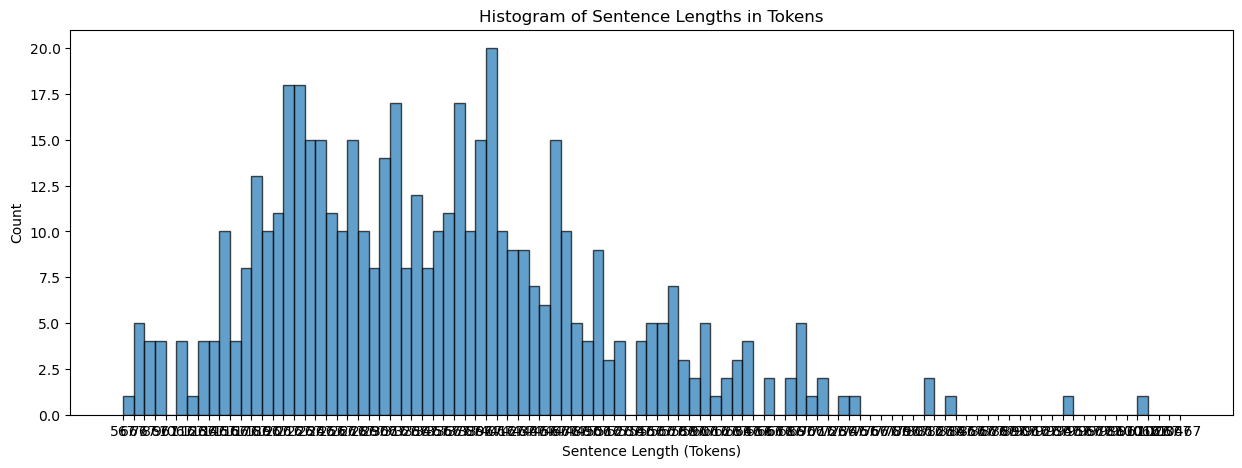

In [7]:
print(np.mean(sentence_length), np.median(sentence_length), np.min(sentence_length), np.max(sentence_length))
plt.figure(figsize=(15, 5))
plt.hist(sentence_length, bins=range(min(sentence_length), max(sentence_length)+2, 100), edgecolor='black', alpha=0.7)
plt.xlabel("Sentence Length (Tokens)")
plt.ylabel("Count")
plt.title("Histogram of Sentence Lengths in Tokens")
plt.xticks(range(min(sentence_length), max(sentence_length) + 1, 100))
plt.show()

Make (Author, Sentence) -Pairs. To feed into the 

In [8]:
enc._special_tokens
eop_token = 100276
enc.eot_token
PADDING_TOKEN = 15
print(enc.decode([15]))
enc.encode('0')

0


[15]

In [9]:
as_pairs = []
max_length = 1024

for i in range(df_.shape[0]):
    text = str(df_.iloc[i]['Text'])
    sentences = sent_tokenize(text)
    author = str(df_.iloc[i]['Author'])
    author_enc = enc.encode(author)
    author_enc = author_enc + [eop_token]
    for j in range(5):
        sentences = [" ".join(sentences[i:i+2]) for i in range(0, len(sentences), 2)]
    sentence_lengths = [len(enc.encode(x)) for x in sentences]
    if len(sentences[int(len(sentences)/2)]) >32:
        sentence_length.extend([len(sentences[int(len(sentences)/2)])])
        text = sentences[int(len(sentences)/2)]
        text_enc = enc.encode(text)
        as_text = author_enc + text_enc + [enc.eot_token]
        if len(as_text) < max_length:
            as_text = as_text + [15] * (max_length - len(as_text))
        if len(as_text) > max_length:
            as_text = as_text[:max_length-1] + [enc.eot_token]
        as_pairs.extend([as_text])
    if len(sentences) > 1:
        print( len(sentences), np.median(sentence_lengths), np.min(sentence_lengths), np.max(sentence_lengths))
        print(len(sentences[int(len(sentences)/2)]))
print(len(as_pairs))
print(as_pairs[0])
for i in as_pairs:
    assert len(i) == max_length

16 673.5 237 910
2394
125 1065.0 84 2290
4701
134 540.5 279 3069
2145
46 832.5 377 1287
2816
30 1055.5 313 1563
3315
64 727.0 297 1227
3200
170 375.0 151 2071
2498
143 943.0 477 1501
4156
257 929.0 270 1728
4754
117 1110.0 343 1769
5233
64 887.0 408 1291
4048
63 1342.0 328 3486
6927
41 972.0 252 1943
4184
154 1389.5 1 3464
2215
65 860.0 137 1828
4569
120 962.5 415 1772
6454
177 875.0 203 5545
3915
339 526.0 14 17212
1904
70 977.0 187 2828
4014
365 493.0 21 2009
697
355 839.0 49 4340
5042
103 953.0 512 4515
3821
17 1004.0 330 1659
5088
51 802.0 467 1150
2439
33 1155.0 263 2164
4011
37 1611.0 752 3949
5510
64 804.0 237 1192
3134
90 1071.5 486 1886
4840
177 601.0 21 1007
2760
40 460.0 257 1195
1619
13 877.0 572 1315
3042
138 1130.0 246 3812
4880
62 900.0 331 1247
4636
15 755.0 242 1392
6322
16 1386.5 498 1714
6833
252 928.5 187 1751
4415
6 966.0 518 1618
7425
288 986.5 34 2416
6987
42 1129.5 129 1834
4978
115 935.0 341 1997
5367
33 862.0 476 1848
3488
27 601.0 243 1210
2011
3 964.0 636 14

In [10]:
enc.decode(as_pairs[0])

'Color Photography, Vol. 1, No. 1 Various<|endofprompt|>I like that. I used to live in the grass lands. It was very warm there. I ran among the thick grass blades, and sat on the stems and ate seeds. I had a wife then. Her feathers were almost like mine. We never made nests. When we wanted a nest, we found a hole in a gum tree. I used to sing to my wife while she sat on the nest. I can mock other birds. Sometimes I warble and chirp at the same time. Then it sounds like two birds singing. My tongue is short and thick, and this helps me to talk. But I have been talking too much. My tongue is getting tired. I think I\'ll have a ride on Pussy\'s back. Good bye. * * * Parrakeets have a great fondness for the grass lands, where they may be seen in great numbers, running amid the thick grass blades, clinging to their stems, or feeding on their seeds. Grass seed is their constant food in their native country. In captivity they take well to canary seed, and what is remarkable, never pick food w

In [11]:
import torch
torch.tensor(as_pairs).shape

torch.Size([497, 1024])

In [12]:
print(sentences[20])
len(enc.encode(sentences[20]))

The landlord, to get him out of the inn, replied with no less rhetoric though with shorter words, and without calling upon him to pay the reckoning let him go with a Godspeed. CHAPTER IV. OF WHAT HAPPENED TO OUR KNIGHT WHEN HE LEFT THE INN Day was dawning when Don Quixote quitted the inn, so happy, so gay, so exhilarated at finding himself now dubbed a knight, that his joy was like to burst his horse-girths. However, recalling the advice of his host as to the requisites he ought to carry with him, especially that referring to money and shirts, he determined to go home and provide himself with all, and also with a squire, for he reckoned upon securing a farm-labourer, a neighbour of his, a poor man with a family, but very well qualified for the office of squire to a knight. With this object he turned his horse’s head towards his village, and Rocinante, thus reminded of his old quarters, stepped out so briskly that he hardly seemed to tread the earth. He had not gone far, when out of a t

3196

In [13]:
merged_strings = [" ".join(sentences[i:i+2]) for i in range(0, len(sentences), 2)]

len(merged_strings), min([len(enc.encode(x)) for x in merged_strings]), max([len(enc.encode(x)) for x in merged_strings]), np.median([len(enc.encode(x)) for x in merged_strings])

(50, 2314, 8072, 5320.0)

In [14]:
merged_strings = [" ".join(merged_strings[i:i+2]) for i in range(0, len(merged_strings), 2)]

len(merged_strings), min([len(enc.encode(x)) for x in merged_strings]), max([len(enc.encode(x)) for x in merged_strings]), np.median([len(enc.encode(x)) for x in merged_strings])

(25, 5748, 15742, 10740.0)

for whole dataset

In [15]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize

# Function to process each chunk
def process_chunk(chunk, enc):
    sentence_length = []
    as_pairs = []
    for i in range(chunk.shape[0]):
        text = str(chunk.iloc[i]['Text'])
        sentences = sent_tokenize(text)
        author = str(chunk.iloc[i]['Author'])
        author_enc = enc.encode(author)
        author_enc = author_enc + [eop_token]
        for _ in range(5):  # Merge sentences 3 times
            sentences = [" ".join(sentences[k:k+2]) for k in range(0, len(sentences), 2)]
        
        sentence_lengths = [len(enc.encode(x)) for x in sentences]
        if len(sentences[int(len(sentences)/2)]) >32:
            sentence_length.extend([len(sentences[int(len(sentences)/2)])])
            text = sentences[int(len(sentences)/2)]
            text_enc = enc.encode(text)
            as_text = author_enc + text_enc + [enc.eot_token]
            if len(as_text) < max_length:
                as_text = as_text + [15] * (max_length - len(as_text))
            if len(as_text) > max_length:
                as_text = as_text[:max_length-1] + [enc.eot_token]
            as_pairs.extend([as_text])
    return as_pairs

# Read the large CSV file in chunks
chunk_size = 1000  # Adjust based on memory limits
sentence_length_total = []

df_iterator = pd.read_csv("data/dataset_full_pre_text.csv", chunksize=chunk_size)  # Replace with actual file
i = 0
for chunk in df_iterator:
    curr_pairs = process_chunk(chunk, enc)
    print(curr_pairs)
    print(len(curr_pairs))
    sentence_length_total.extend(curr_pairs)
    print("Processed chunk", len(sentence_length_total))
# Final results
print(sentence_length_total)
print(len(sentence_length_total[1]))
for i in sentence_length_total:
    assert len(i) == max_length
print("Total processed sentence lengths:", len(sentence_length_total))


KeyboardInterrupt: 

In [32]:
import pandas as pd
import numpy as np
import torch
from nltk.tokenize import sent_tokenize

# Function to process each chunk
def process_chunk(chunk, enc, max_length, eop_token):
    as_pairs = []
    for i in range(chunk.shape[0]):
        text = str(chunk.iloc[i]['Text'])
        sentences = sent_tokenize(text)
        author = str(chunk.iloc[i]['Author'])
        author_enc = enc.encode(author)
        author_enc = author_enc + [eop_token]

        for _ in range(5):  # Merge sentences 5 times
            sentences = [" ".join(sentences[k:k+2]) for k in range(0, len(sentences), 2)]
        
        sentence_lengths = [len(enc.encode(x)) for x in sentences]
        
        if len(sentences[int(len(sentences)/2)]) > 32:
            text = sentences[int(len(sentences)/2)]
            text_enc = enc.encode(text)
            as_text = author_enc + text_enc + [enc.eot_token]
            
            # Padding to max_length
            if len(as_text) < max_length:
                as_text = as_text + [15] * (max_length - len(as_text))
            if len(as_text) > max_length:
                as_text = as_text[:max_length-1] + [enc.eot_token]

            as_pairs.append(as_text)

    return torch.tensor(as_pairs, dtype=torch.long)  # Convert to PyTorch tensor

# Read the large CSV file in chunks and save as PyTorch tensors
chunk_size = 1000  # Adjust based on memory limits
max_length = 1024  # Define max length
eop_token = 100276  # Replace with actual end-of-prompt token
output_file = "processed_data.pt"
all_tensors = []

for i, chunk in enumerate(pd.read_csv("data/dataset_full_pre_text.csv", chunksize=chunk_size)):
    curr_tensor = process_chunk(chunk, enc, max_length, eop_token)
    
    if curr_tensor.shape[0] == 0:
        continue  # Skip empty chunks

    all_tensors.append(curr_tensor)
    print(f"Processed chunk {i+1}, Total stored: {sum(t.shape[0] for t in all_tensors)}")

# Save as a single PyTorch tensor
final_tensor = torch.cat(all_tensors, dim=0)
torch.save(final_tensor, output_file)

print(f"✅ Data saved in {output_file}")


Processed chunk 1, Total stored: 992
Processed chunk 2, Total stored: 1977
Processed chunk 3, Total stored: 2927
Processed chunk 4, Total stored: 3908
Processed chunk 5, Total stored: 4892
Processed chunk 6, Total stored: 5846
Processed chunk 7, Total stored: 6827
Processed chunk 8, Total stored: 7786
Processed chunk 9, Total stored: 8730
Processed chunk 10, Total stored: 9657
Processed chunk 11, Total stored: 10581
Processed chunk 12, Total stored: 11535
Processed chunk 13, Total stored: 12508
Processed chunk 14, Total stored: 13481
Processed chunk 15, Total stored: 14481
Processed chunk 16, Total stored: 14810
✅ Data saved in processed_data.pt


In [28]:
tt = torch.load('processed_data.pt')
print(tt.shape)

torch.Size([14810, 1024])


In [30]:
import re

def middle_text(text):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    print(len(sentences) == len(sent_tokenize(text)))
    sentences = sentences[int(len(sentences)/3):]
    sentences = " ".join(sentences)
    return sentences

texts = df['Text'].apply(middle_text)
texts

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


0     Quicksilver is not used in the ground-sluice. ...
1     By ten o'clock we resumed our march. Our corps...
2     O that people did but know this to cleanse the...
3     During the meal small pieces of roots of fir t...
4     dit l'autre étonné. --Il y a, dit Rodolphe, qu...
5     The Turk sank to the ground with a hollow groa...
6     Me, of these Nor skilled nor studious, higher ...
7     RUSTIC HOUSES.] RUSTIC HOUSES. The first group...
8     Is it observed beyond the limits of a regular ...
9     Mercury was changing in appearance. As they ne...
10    Their cathedral stood in urgent need of repair...
11    My first discovery made, however, during the b...
12    The coroner, the doctor, the clerk carrying th...
13    Has the medicine done your back good? My back?...
14    "How are you going to fasten that seat so it w...
15    "A bird!" he thought. Then a flash of red in s...
16    John, I love!" She saw the half-surprised, hal...
17    One of them was a Little, Small, Wee Bear;

In [19]:
import re

def regex_sentence_split(text):
    # Regular expression to split sentences based on `.`, `!`, or `?`
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())  
    return sentences

# Example usage
text = "Hello! How are you doing? I'm working on sentence splitting. It's quite useful."
sentences = regex_sentence_split(text)

print(sentences)


['Hello!', 'How are you doing?', "I'm working on sentence splitting.", "It's quite useful."]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch



Shape of log_probs_per_token: (5, 10, 5)


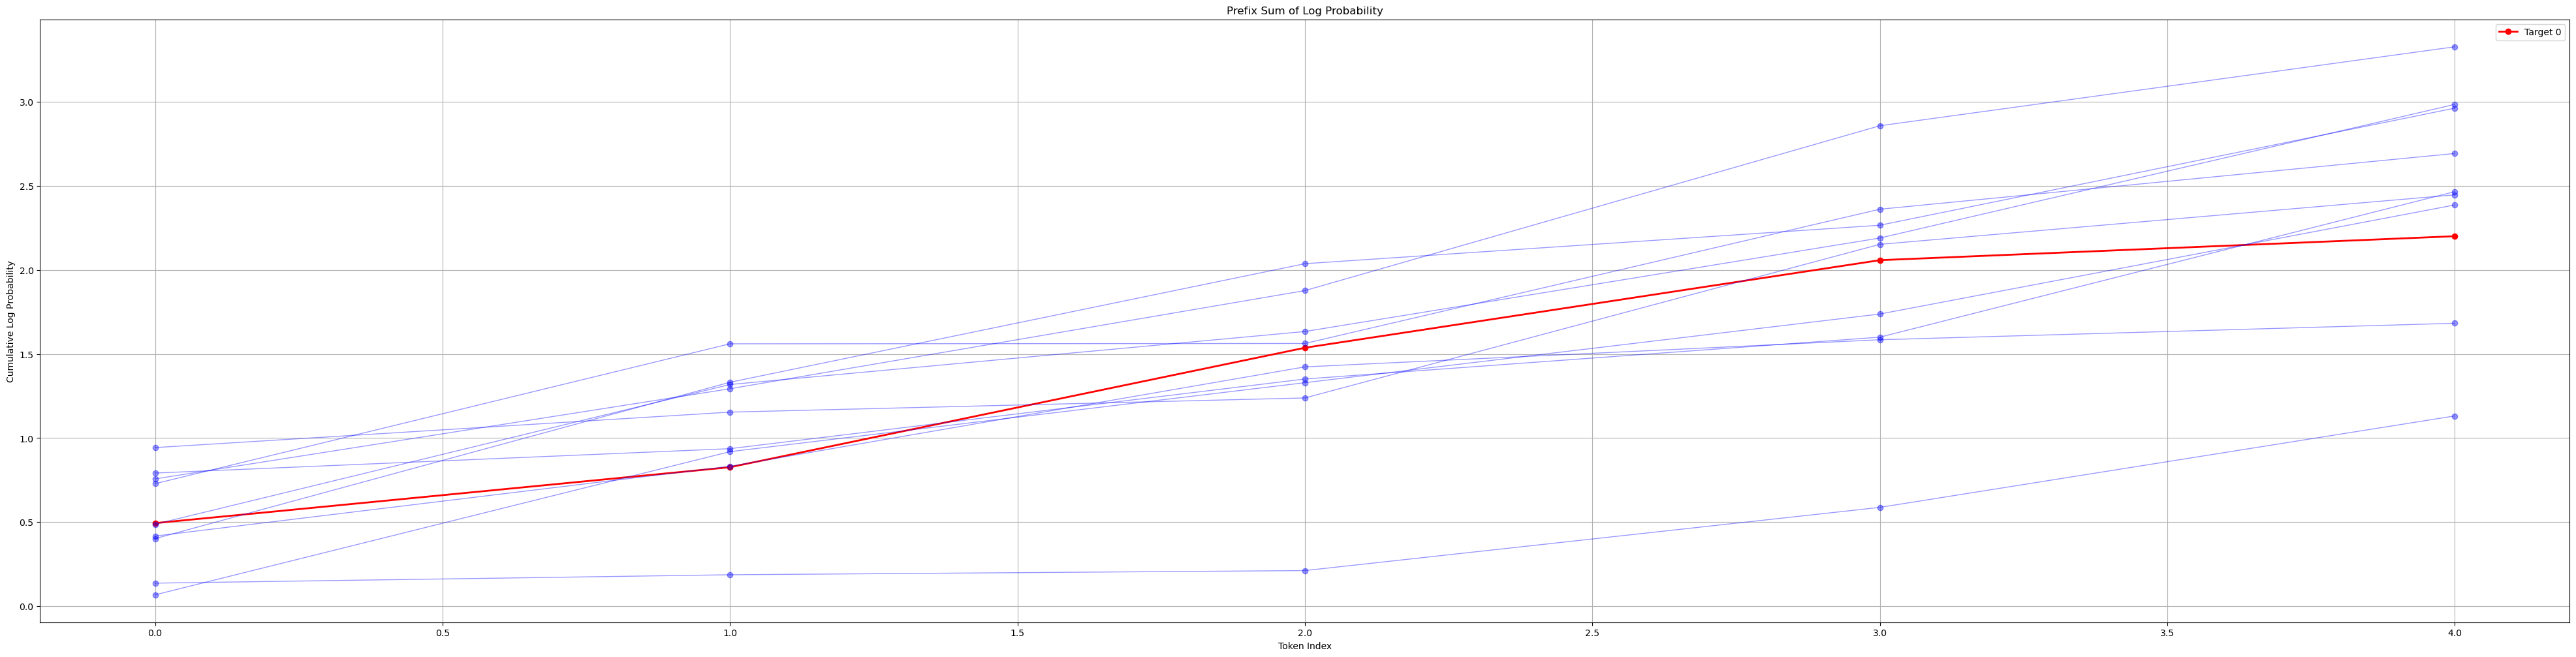

In [23]:
def plot_per_token_prob(log_probs_per_token,row_id, title='Per-Token Log Probability', figsize_=(10, 6), x_label='Vocabulary Index', y_label='Log Probability'):
    plt.figure(figsize=figsize_)
    plt.plot(log_probs_per_token[row_id].T, alpha=0.5, color='blue')
    plt.plot(log_probs_per_token[row_id, row_id], color='red', linewidth=2, label=f'Target {row_id}', alpha=1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
def plot_heat(log_prob_matrix, x_label='Author Prompt Index (i)' , y_label='Target Text Index (j)', title='Negative log-likelihood', figsize_=(12, 8)):
    row_min = log_prob_matrix.min(axis=1, keepdims=True)  # Min per column
    row_max = log_prob_matrix.max(axis=1, keepdims=True)  # Max per column
    norm_matrix = (log_prob_matrix - row_min) / (row_max - row_min + 1e-8)  # Avoid div by zero
    plt.figure(figsize=figsize_)
    ax = sns.heatmap(norm_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

    # Highlight diagonal elements where i == j
    for i in range(log_prob_matrix.shape[0]):
        ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
    min_indices = np.argmin(log_prob_matrix, axis=1)  
    for row, col in enumerate(min_indices):
        plt.scatter(col + 0.5, row + 0.5, color='lime', s=10, edgecolors='black', lw=1.5, marker='o')  # Green markers
    plt.title(f"{title}")
    plt.xlabel(f"{x_label}")
    plt.ylabel(f"{y_label}")
    plt.show()
import matplotlib.pyplot as plt

def plot_per_token_prob(log_probs_per_token, row_id, title='Per-Token Log Probability by Book', 
                        figsize_=(10, 6), x_label='Output Token Index', y_label='Log Probability', 
                        cutoff=None):
    plt.figure(figsize=figsize_)

    if cutoff is not None:
        # Apply cutoff to the third dimension (V) for plotting
        truncated_probs = log_probs_per_token[row_id, :, :cutoff]
    else:
        truncated_probs = log_probs_per_token[row_id]

    # Plot each sequence's per-token probabilities up to the cutoff
    plt.plot(truncated_probs.T, alpha=0.5, color='blue', marker='o')

    # Plot the specific row's diagonal as the red line (assuming it's a meaningful target)
    plt.plot(truncated_probs[row_id], color='red', linewidth=1, label=f'Target {row_id}', alpha=1, marker='o')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()
import matplotlib.pyplot as plt
import numpy as np

def plot_prefix_sum_per_token(log_probs_per_token, row_id, 
                              title='Prefix Sum of Log Probability', 
                              figsize_=(10, 6), 
                              x_label='Output Token Index', 
                              y_label='Cumulative Log Probability'):
    plt.figure(figsize=figsize_)
    
    # Calculate the prefix (cumulative) sum for each candidate in the given row
    # log_probs_per_token[row_id] has shape (num_samples, max_length)
    prefix_sums = np.cumsum(log_probs_per_token[row_id], axis=1)
    
    # Plot each candidate's prefix sum
    for i in range(prefix_sums.shape[0]):
        if i == row_id:
            plt.plot(prefix_sums[i], color='red', linewidth=2, label=f'Target {row_id}', marker='o', alpha=1)
        else:
            plt.plot(prefix_sums[i], alpha=0.4, color='blue', linewidth=1, marker='o')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
lp_test = np.random.rand(5, 10,5)
print("Shape of log_probs_per_token:", lp_test.shape)
plot_prefix_sum_per_token(lp_test, 0, 
                          title='Prefix Sum of Log Probability', 
                          figsize_=(50, 12), 
                          x_label='Token Index', 
                          y_label='Cumulative Log Probability')

def plot_per_token_prob_by_column(log_probs_per_token, column_id, title='Per-Token Log Probability by Author', 
                                  figsize_=(10, 6), x_label='Row Index', y_label='Log Probability', 
                                  cutoff=None):
    plt.figure(figsize=figsize_)

    if cutoff is not None:
        truncated_probs = log_probs_per_token[:, column_id, :cutoff]
    else:
        truncated_probs = log_probs_per_token[:, column_id, :]
    plt.plot(truncated_probs.T, alpha=0.5, color='blue', marker='o')
    target_vector = log_probs_per_token[column_id, column_id, :cutoff] if cutoff else log_probs_per_token[column_id, column_id, :]
    plt.plot(target_vector, color='red', linewidth=2, marker='o', label=f'Target Vector ({column_id}, {column_id})')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()


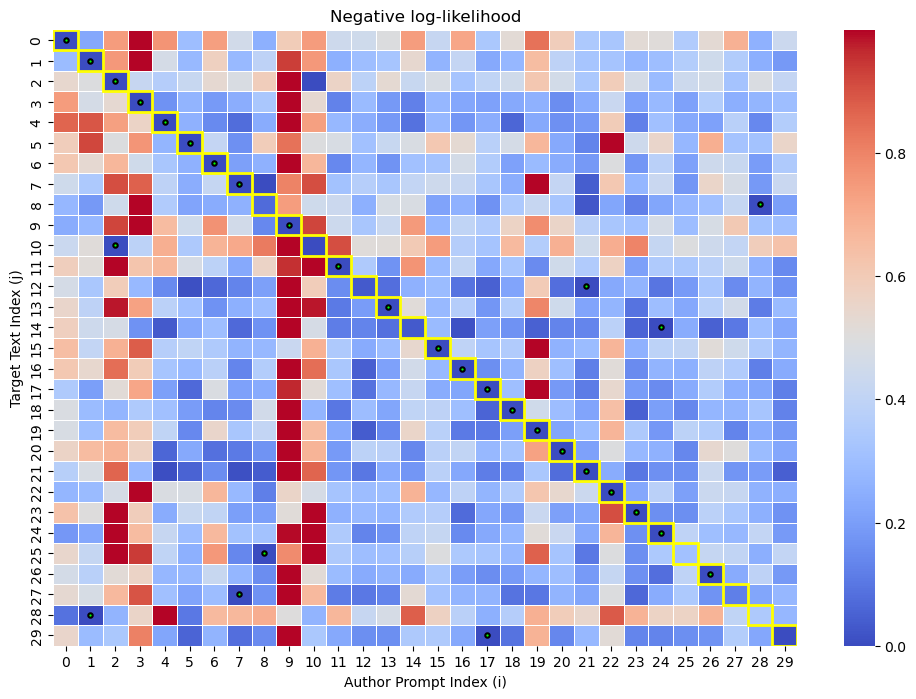

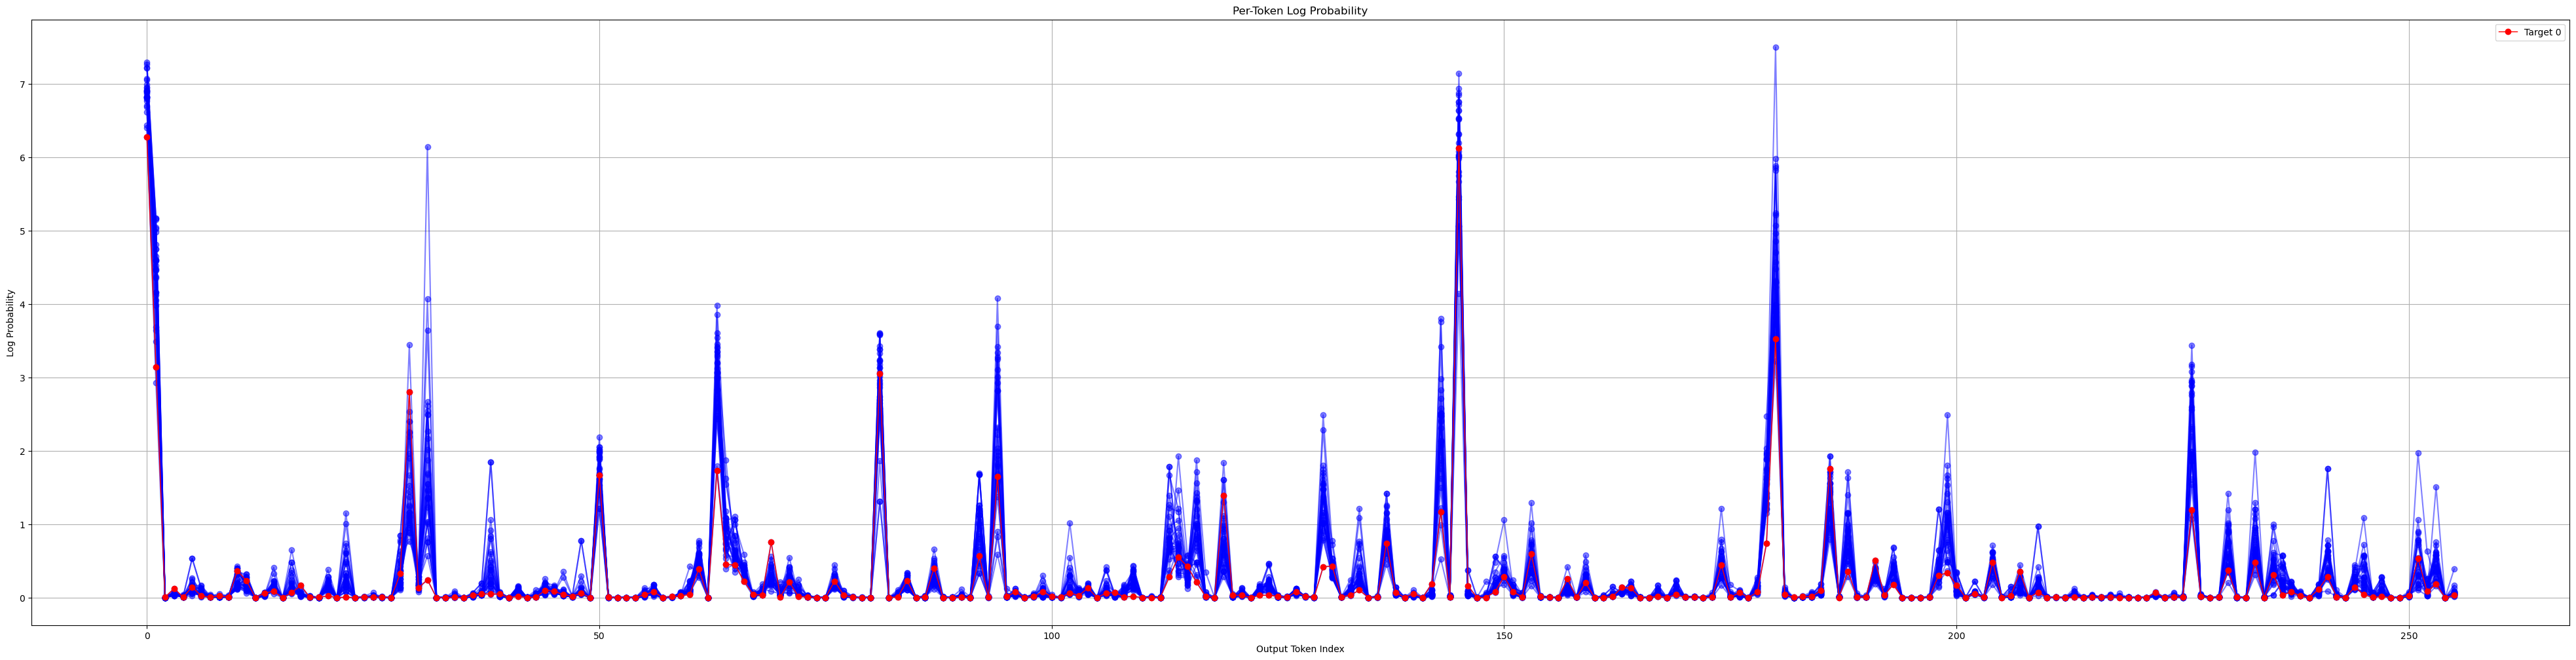

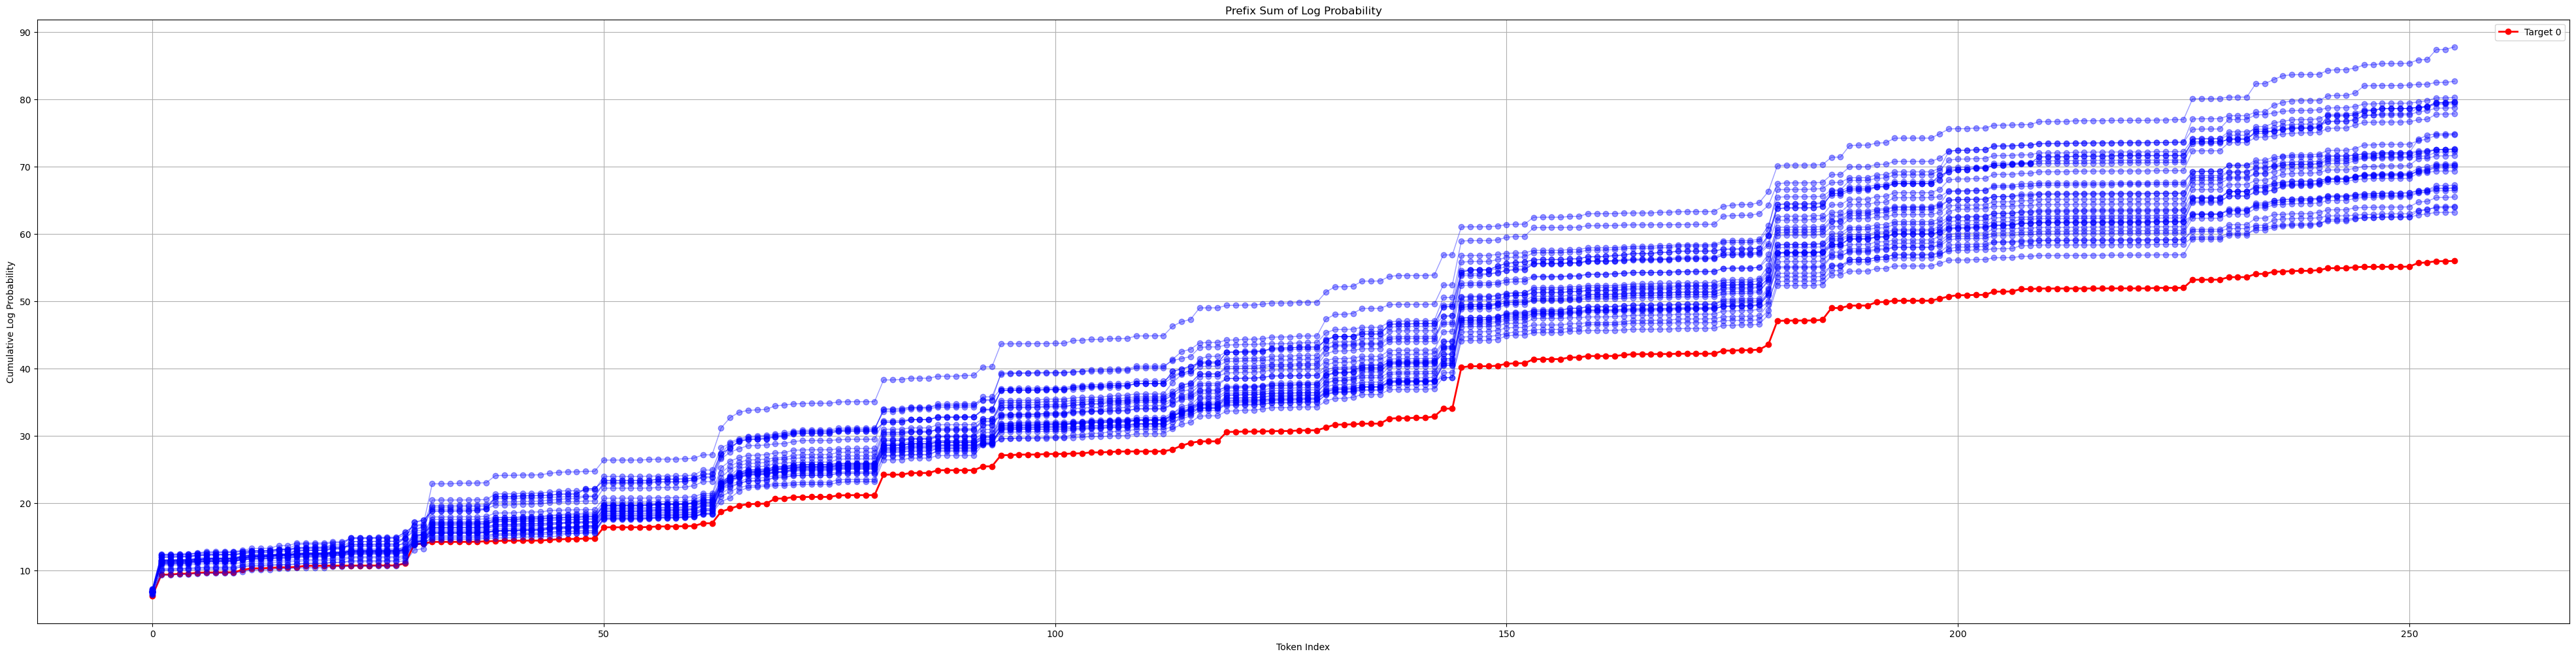

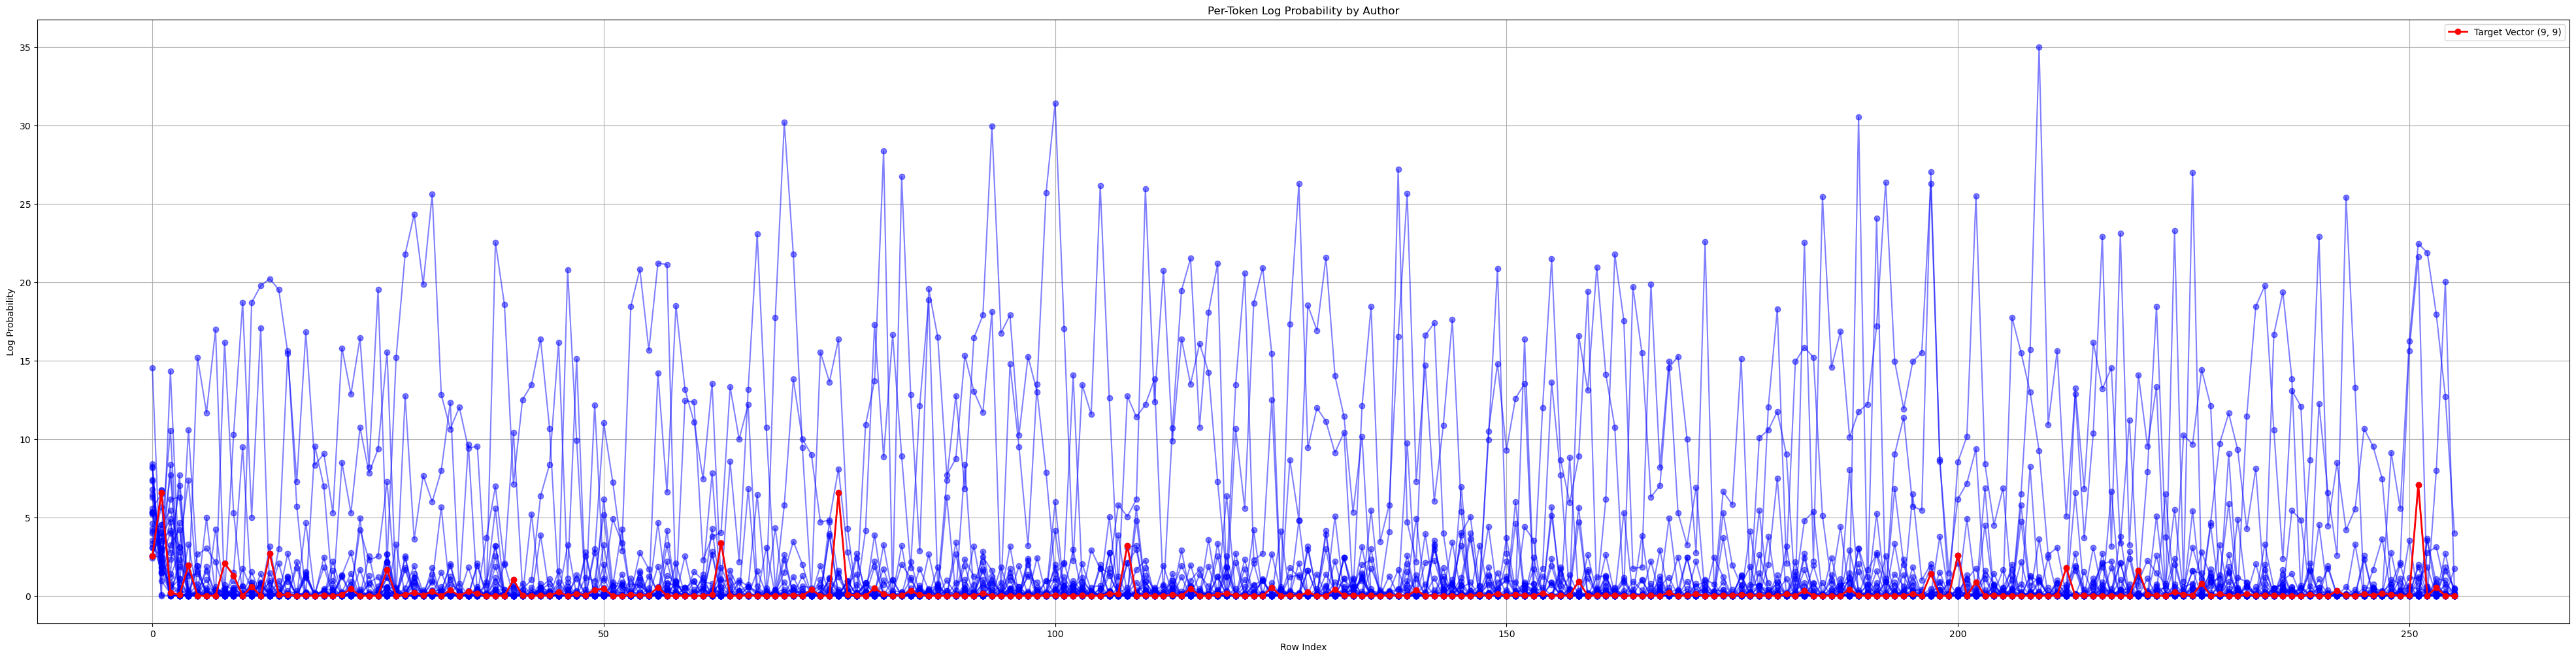

In [24]:
model_type = 'enc_dec'
test_id = 1
data_type = 'val'
path = f'tests/{model_type}/test_{test_id}/{data_type}_data/'
log_probs_per_token = np.load(path + 'log_probs_per_token.npy')
log_probs_matrix = np.load(path + 'log_probs_matrix.npy')
plot_heat(log_probs_matrix, title='Negative log-likelihood', figsize_=(12, 8))
plot_per_token_prob(log_probs_per_token, row_id=0, title='Per-Token Log Probability', figsize_=(50, 12), x_label='Output Token Index', y_label='Log Probability', cutoff=1000)
plot_prefix_sum_per_token(log_probs_per_token, row_id=0, title='Prefix Sum of Log Probability', figsize_=(50, 12), x_label='Token Index', y_label='Cumulative Log Probability')
plot_per_token_prob_by_column(log_probs_per_token, column_id=9, title='Per-Token Log Probability by Author', figsize_=(50, 12), x_label='Row Index', y_label='Log Probability', cutoff=1000)

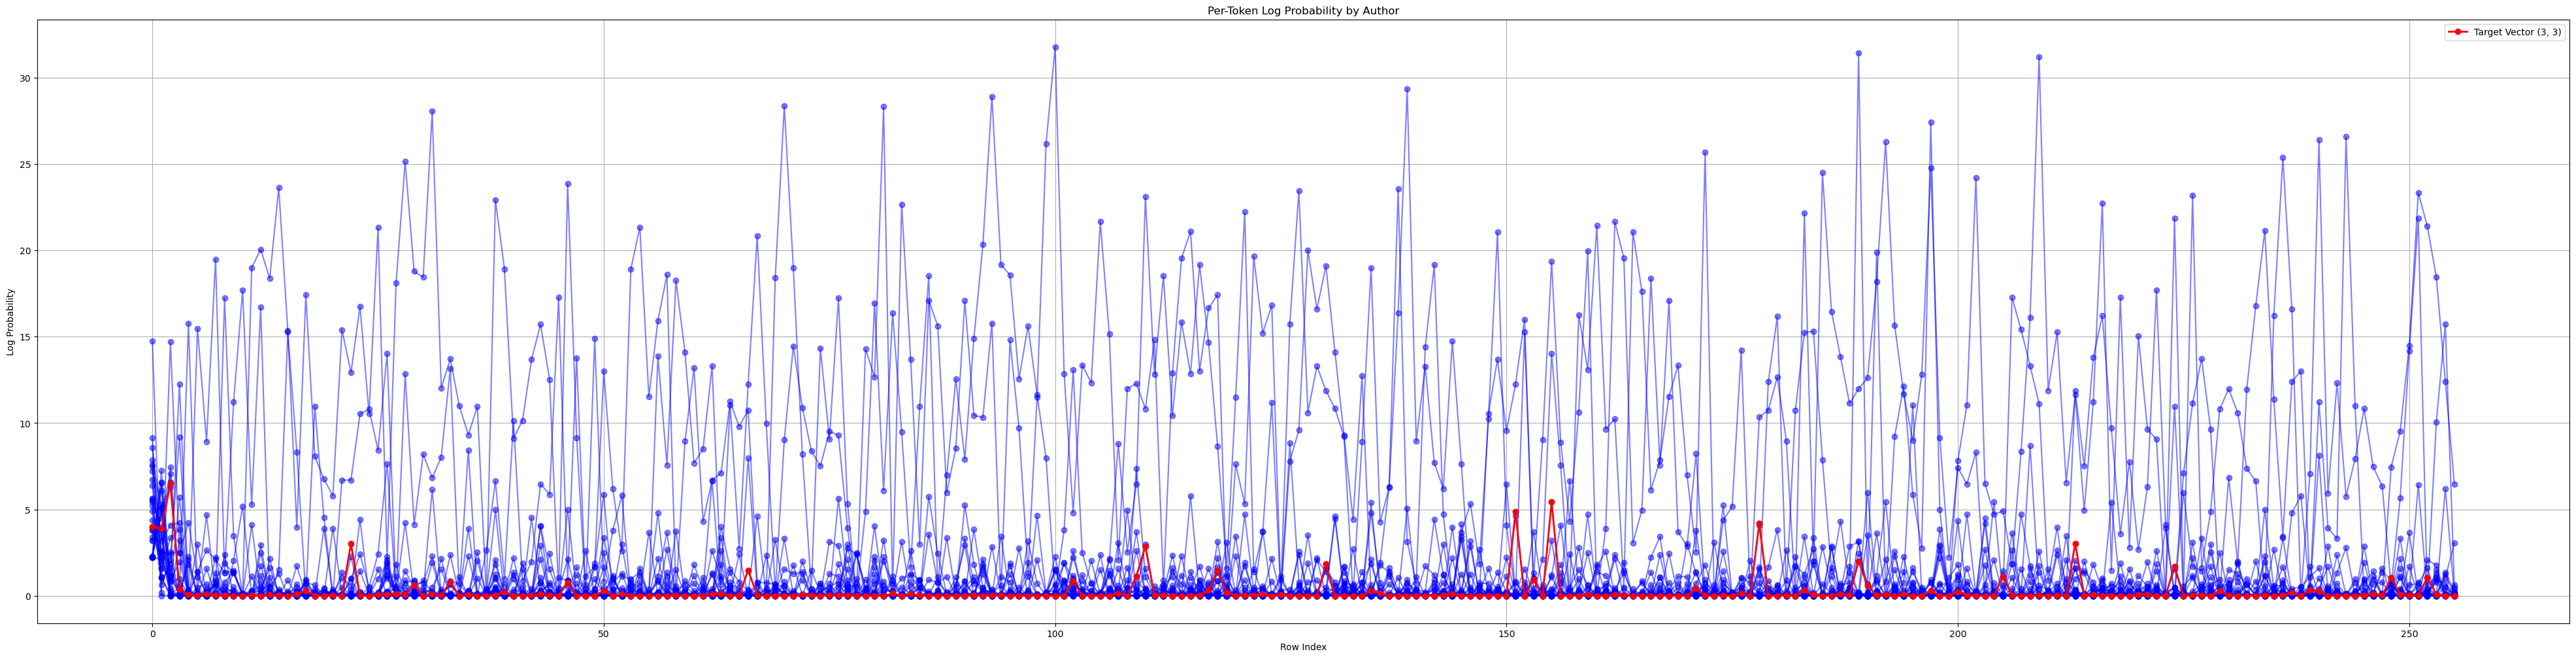

In [25]:
column_id = 3
plot_per_token_prob_by_column(log_probs_per_token, column_id=column_id, title='Per-Token Log Probability by Author', figsize_=(50, 12), x_label='Row Index', y_label='Log Probability', cutoff=1000)

In [1]:
import pandas as pd
import numpy as np
import torch